# Creating machine learning model for predicting delay in payment of invoices

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

import warnings
warnings.filterwarnings("ignore")

#### Loading data from csv file

In [2]:
file_data = pd.read_csv('temp_data.csv')

In [3]:
file_data.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200418007,AM,2019-07-01 00:00:00,2019.0,1.929497e+09,2019-06-16,20190615,20190616,20190701.0,USD,RV,1.0,NaN,12109.70,20190616.0,NAA8,1.929497e+09,0
1,U001,200769623,WAL-MAR,2019-06-17 00:00:00,2019.0,1.929418e+09,2019-06-04,20190602,20190604,20190619.0,USD,RV,1.0,NaN,1094.40,20190604.0,NAH4,1.929418e+09,0
2,U001,0200769623,WAL-MAR llc,2019-09-16 00:00:00,2019.0,1.929826e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,1.0,NaN,53124.49,20190905.0,NAH4,1.929826e+09,0
3,U001,0200726979,BJ'S systems,NaN,2020.0,1.930581e+09,2020-02-29,20200228,20200229,20200315.0,USD,RV,1.0,NaN,202.06,20200229.0,NAA8,1.930581e+09,1
4,U001,0200974851,RESTA corp,2019-11-13 00:00:00,2019.0,1.930051e+09,2019-10-24,20191024,20191024,20191113.0,USD,RV,1.0,NaN,1899.16,20191024.0,NAD1,1.930051e+09,0
5,U001,0200936373,SUPE in,2019-08-02 00:00:00,2019.0,1.929623e+09,2019-07-15,20190715,20190715,20190730.0,USD,RV,1.0,NaN,104414.51,20190715.0,NAA8,1.929623e+09,0
6,U001,0200472708,WEST P corporation,2019-04-04 00:00:00,2019.0,1.929035e+09,2019-03-26,20190326,20190326,20190405.0,USD,RV,1.0,NaN,23175.70,20190326.0,NA10,1.929035e+09,0
7,U001,0200704858,WAKE foundation,NaN,2020.0,1.930620e+09,2020-03-08,20200307,20200308,20200323.0,USD,RV,1.0,NaN,20183.20,20200308.0,NAA8,1.930620e+09,1
8,U001,0200769623,WAL-MAR,NaN,2020.0,1.930639e+09,2020-03-12,20200311,20200312,20200327.0,USD,RV,1.0,NaN,26549.39,20200312.0,NAH4,1.930639e+09,1
9,U001,0200439158,POST,2019-04-22 00:00:00,2019.0,1.929073e+09,2019-04-05,20190402,20190405,20190420.0,USD,RV,1.0,NaN,22602.24,20190405.0,NAA8,1.929073e+09,0


In [4]:
file_data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999300e+04,50000.000000
mean,2019.305140,2.012408e+09,2.019350e+07,2.019353e+07,2.019368e+07,1.0,NaN,32383.731042,2.019353e+07,2.011360e+09,0.200000
std,0.460471,2.903874e+08,4.491001e+03,4.478108e+03,4.471497e+03,0.0,NaN,39216.084336,4.479646e+03,2.765598e+08,0.400004
min,2019.000000,1.928488e+09,2.018123e+07,2.018123e+07,2.018080e+07,1.0,NaN,1.150000,2.018072e+07,1.928488e+09,0.000000
25%,2019.000000,1.929339e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4880.180000,2.019051e+07,1.929338e+09,0.000000
50%,2019.000000,1.929974e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17501.480000,2.019091e+07,1.929974e+09,0.000000
75%,2020.000000,1.930623e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47261.557500,2.020013e+07,1.930623e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,624300.230000,2.020052e+07,2.960635e+09,1.000000


In [5]:
file_data.size,file_data.shape

(950000, (50000, 19))

In [6]:
file_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

#### Dealing with the null values in our data

In [7]:
file_data.drop(columns=['area_business'],inplace=True)    # column dropped because all values are null

In [8]:
file_data[file_data['invoice_id'].isna()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5781,CA02,0140106054,TREE in,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,1.0,216.80,20190131.0,CA10,NaN,0
13155,CA02,0140104429,COSTCO in,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,5353.20,20190322.0,CA10,NaN,0
24836,CA02,0100030194,AMAZO in,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190308,20190318.0,CAD,X2,1.0,2205.70,20190308.0,CA10,NaN,0
25111,CA02,0140104225,SAVE-ON- in,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190220,20190302.0,CAD,X2,1.0,3620.16,20190220.0,CA10,NaN,0
26242,CA02,0140104223,H Y LO corporation,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190329,20190408.0,CAD,X2,1.0,27816.00,20190329.0,CA10,NaN,0
39018,CA02,0140106054,TREE associates,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190213,20190223.0,CAD,X2,1.0,216.80,20190213.0,CA10,NaN,0
45292,CA02,0140104223,H Y LO corporation,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190329,20190408.0,CAD,X2,1.0,27816.00,20190329.0,CA10,NaN,0


In [9]:
file_data.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.026976,0.977839,0.983498,0.988974,NaN,-0.000776,0.983647,-0.025815,0.754517
doc_id,-0.026976,1.000000,-0.024522,-0.026285,-0.028770,NaN,0.173250,-0.024210,1.000000,-0.024354
document_create_date,0.977839,-0.024522,1.000000,0.993717,0.973961,NaN,0.001066,0.992767,-0.023096,0.764346
document_create_date.1,0.983498,-0.026285,0.993717,1.000000,0.979094,NaN,0.000729,0.999045,-0.024839,0.763883
due_in_date,0.988974,-0.028770,0.973961,0.979094,1.000000,NaN,-0.002058,0.979890,-0.027369,0.754451
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.000776,0.173250,0.001066,0.000729,-0.002058,NaN,1.000000,0.001556,0.184132,0.002985
baseline_create_date,0.983647,-0.024210,0.992767,0.999045,0.979890,NaN,0.001556,1.000000,-0.022659,0.763528
invoice_id,-0.025815,1.000000,-0.023096,-0.024839,-0.027369,NaN,0.184132,-0.022659,1.000000,-0.023678
isOpen,0.754517,-0.024354,0.764346,0.763883,0.754451,NaN,0.002985,0.763528,-0.023678,1.000000


In [10]:
file_data.invoice_id.fillna(file_data.doc_id,inplace=True)

In [11]:
file_data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [12]:
file_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200418007,AM,2019-07-01 00:00:00,2019.0,1.929497e+09,2019-06-16,20190615,20190616,20190701.0,USD,RV,1.0,12109.70,20190616.0,NAA8,1.929497e+09,0
1,U001,200769623,WAL-MAR,2019-06-17 00:00:00,2019.0,1.929418e+09,2019-06-04,20190602,20190604,20190619.0,USD,RV,1.0,1094.40,20190604.0,NAH4,1.929418e+09,0
2,U001,0200769623,WAL-MAR llc,2019-09-16 00:00:00,2019.0,1.929826e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,1.0,53124.49,20190905.0,NAH4,1.929826e+09,0
3,U001,0200726979,BJ'S systems,NaN,2020.0,1.930581e+09,2020-02-29,20200228,20200229,20200315.0,USD,RV,1.0,202.06,20200229.0,NAA8,1.930581e+09,1
4,U001,0200974851,RESTA corp,2019-11-13 00:00:00,2019.0,1.930051e+09,2019-10-24,20191024,20191024,20191113.0,USD,RV,1.0,1899.16,20191024.0,NAD1,1.930051e+09,0


#### Converting date columns into usable formats

In [13]:
file_data.rename(columns = {'document type':'document_type'},inplace=True)
#renamed column 'document type' -> 'document_type' for convenience

In [14]:
file_data.posting_date = pd.to_datetime(file_data.posting_date)   #posting date converted from object to datetime type

In [15]:
file_data.document_create_date = pd.to_datetime(file_data.document_create_date,format="%Y%m%d")

In [16]:
file_data.due_in_date = pd.to_datetime(file_data.due_in_date,format="%Y%m%d")

In [17]:
file_data.baseline_create_date = pd.to_datetime(file_data.baseline_create_date,format="%Y%m%d")

In [18]:
file_data.clear_date = pd.to_datetime(file_data.clear_date)

In [19]:
file_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200418007,AM,2019-07-01,2019.0,1.929497e+09,2019-06-16,2019-06-15,20190616,2019-07-01,USD,RV,1.0,12109.70,2019-06-16,NAA8,1.929497e+09,0
1,U001,200769623,WAL-MAR,2019-06-17,2019.0,1.929418e+09,2019-06-04,2019-06-02,20190604,2019-06-19,USD,RV,1.0,1094.40,2019-06-04,NAH4,1.929418e+09,0
2,U001,0200769623,WAL-MAR llc,2019-09-16,2019.0,1.929826e+09,2019-09-05,2019-09-04,20190905,2019-09-20,USD,RV,1.0,53124.49,2019-09-05,NAH4,1.929826e+09,0
3,U001,0200726979,BJ'S systems,NaT,2020.0,1.930581e+09,2020-02-29,2020-02-28,20200229,2020-03-15,USD,RV,1.0,202.06,2020-02-29,NAA8,1.930581e+09,1
4,U001,0200974851,RESTA corp,2019-11-13,2019.0,1.930051e+09,2019-10-24,2019-10-24,20191024,2019-11-13,USD,RV,1.0,1899.16,2019-10-24,NAD1,1.930051e+09,0


In [20]:
file_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1             int64
due_in_date               datetime64[ns]
invoice_currency                  object
document_type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

#### isOpen = 1 means invoice is not cleared yet so taking those rows for test data

In [21]:
test_data = file_data[file_data.isOpen==1]

In [22]:
test_data.reset_index(drop=True,inplace=True)  #resetting index of new rows

#### isOpen = 0 means invoice is cleared so taking these rows into temp to further break between train and validation data

In [23]:
temp = file_data[file_data.isOpen==0]

In [24]:
test_data.shape,temp.shape

((10000, 18), (40000, 18))

In [25]:
temp['delay'] = temp['clear_date'] - temp['due_in_date']
temp['delay'] = temp['delay'].dt.days


test_data['delay'] = test_data['clear_date'] - test_data['due_in_date']
test_data['delay'] = test_data['delay'].dt.days

In [26]:
temp.document_create_date.min(),temp.document_create_date.max()

(Timestamp('2018-12-26 00:00:00'), Timestamp('2020-02-28 00:00:00'))

#### Sorting historical data on base of document_create_date

In [27]:
temp.sort_values(by='document_create_date',inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
train_data,valid_data,train_out,valid_out = train_test_split(temp,temp.delay,test_size=0.2,
                                                             random_state=0 , shuffle = False)

In [29]:
train_data.shape,train_out.shape

((32000, 19), (32000,))

In [30]:
valid_data.shape,valid_out.shape

((8000, 19), (8000,))

In [31]:
test_data.shape

(10000, 19)

In [32]:
train_data[train_data.duplicated()]          ## checking for duplicates

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
33698,U001,0200900909,SYSCO llc,2019-01-23,2019.0,1.928538e+09,2019-01-02,2018-12-29,20190102,2019-01-22,USD,RV,1.0,441.92,2019-01-02,NAD1,1.928538e+09,0,1
48861,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,1.928544e+09,2018-12-31,2018-12-30,20181231,2019-01-15,USD,RV,1.0,70598.28,2018-12-31,NAH4,1.928544e+09,0,-4
36672,U001,0200769623,WAL-MAR co,2019-01-14,2019.0,1.928546e+09,2019-01-02,2018-12-31,20190102,2019-01-17,USD,RV,1.0,69045.11,2019-01-02,NAH4,1.928546e+09,0,-3
13105,U001,0200126819,MCLANE systems,2019-01-14,2019.0,1.928513e+09,2018-12-31,2018-12-31,20181231,2019-01-15,USD,RV,1.0,10617.60,2018-12-31,NAA8,1.928513e+09,0,-1
5306,U001,0200769623,WAL-MAR co,2019-01-14,2019.0,1.928545e+09,2018-12-31,2018-12-31,20181231,2019-01-15,USD,RV,1.0,36329.97,2018-12-31,NAH4,1.928545e+09,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29858,U001,0200769623,WAL-MAR corporation,2019-12-02,2019.0,1.930158e+09,2019-11-18,2019-11-15,20191118,2019-12-03,USD,RV,1.0,14447.27,2019-11-18,NAH4,1.930158e+09,0,-1
28419,U001,0200769623,WAL-MAR us,2019-12-03,2019.0,1.930158e+09,2019-11-17,2019-11-15,20191117,2019-12-02,USD,RV,1.0,513.83,2019-11-17,NAH4,1.930158e+09,0,1
27465,U001,0200673194,PERFOR co,2019-11-21,2019.0,1.930163e+09,2019-11-18,2019-11-16,20191118,2019-12-03,USD,RV,1.0,38704.89,2019-11-18,NAA8,1.930163e+09,0,-12
25048,U001,0200705742,DOT corp,2019-12-06,2019.0,1.930162e+09,2019-11-16,2019-11-16,20191116,2019-12-18,USD,RV,1.0,17509.24,2019-11-16,NA32,1.930162e+09,0,-12


In [33]:
train_data.drop_duplicates(keep='first',inplace=True)

In [34]:
train_data[train_data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay


In [35]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
35532,U013,0140103335,PARAM in,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,1574.71,2018-12-30,NAVE,1.991820e+09,0,-6
33502,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,24154.65,2018-12-30,NAVE,1.991820e+09,0,-6
38164,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190101,2019-01-31,USD,RV,1.0,6692.33,2019-01-01,NAVE,1.991820e+09,0,-8
45871,U013,0140103423,COS foundation,2019-01-22,2019.0,1.991819e+09,2019-01-01,2018-12-28,20190101,2019-01-31,USD,RV,1.0,2789.45,2019-01-01,NAVE,1.991819e+09,0,-9
13265,U013,0100009932,SYSCO IN corp,2019-02-28,2019.0,1.991819e+09,2018-12-30,2018-12-28,20181230,2019-01-29,USD,RV,1.0,18602.72,2018-12-30,NAVE,1.991819e+09,0,30


### Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='delay', ylabel='Density'>

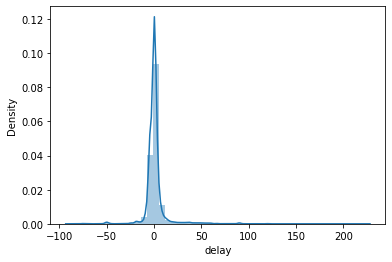

In [36]:
sns.distplot(train_out)

In [37]:
train_data.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
35532,U013,0140103335,PARAM in,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,1574.71,2018-12-30,NAVE,1.991820e+09,0,-6
33502,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,24154.65,2018-12-30,NAVE,1.991820e+09,0,-6
38164,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190101,2019-01-31,USD,RV,1.0,6692.33,2019-01-01,NAVE,1.991820e+09,0,-8


<AxesSubplot:xlabel='delay', ylabel='document_create_date'>

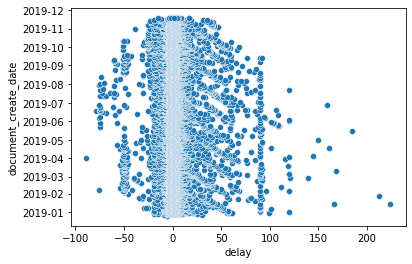

In [38]:
sns.scatterplot(data=train_data, x="delay", y="document_create_date")

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

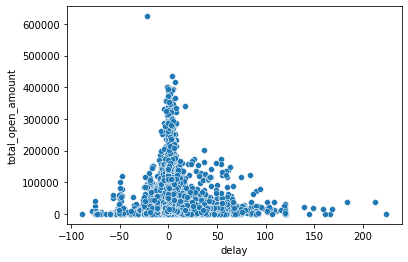

In [39]:
sns.scatterplot(data=train_data, x="delay", y="total_open_amount")

In [40]:
train_data.cust_number.nunique()

1277

<AxesSubplot:xlabel='delay', ylabel='business_code'>

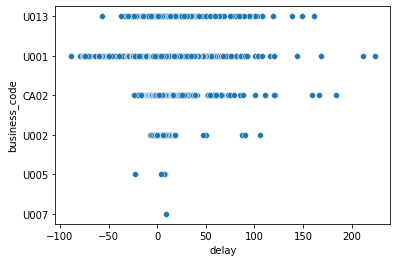

In [41]:
sns.scatterplot(data=train_data, x="delay", y="business_code")

<AxesSubplot:xlabel='delay', ylabel='invoice_currency'>

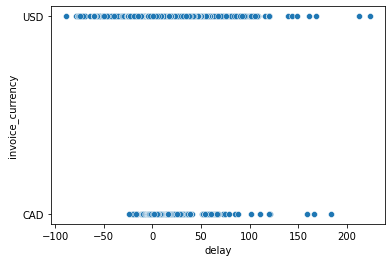

In [42]:
sns.scatterplot(data=train_data, x="delay", y="invoice_currency")

In [43]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
35532,U013,0140103335,PARAM in,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,1574.71,2018-12-30,NAVE,1.991820e+09,0,-6
33502,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,USD,RV,1.0,24154.65,2018-12-30,NAVE,1.991820e+09,0,-6
38164,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190101,2019-01-31,USD,RV,1.0,6692.33,2019-01-01,NAVE,1.991820e+09,0,-8
45871,U013,0140103423,COS foundation,2019-01-22,2019.0,1.991819e+09,2019-01-01,2018-12-28,20190101,2019-01-31,USD,RV,1.0,2789.45,2019-01-01,NAVE,1.991819e+09,0,-9
13265,U013,0100009932,SYSCO IN corp,2019-02-28,2019.0,1.991819e+09,2018-12-30,2018-12-28,20181230,2019-01-29,USD,RV,1.0,18602.72,2018-12-30,NAVE,1.991819e+09,0,30


In [44]:
train_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1             int64
due_in_date               datetime64[ns]
invoice_currency                  object
document_type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
delay                              int64
dtype: object

#### Converting amount of CAD into USD

In [45]:
train_data['total_open_amount'] = np.select([(train_data['invoice_currency']=='USD'),(train_data['invoice_currency']=='CAD')],[train_data['total_open_amount'],train_data['total_open_amount']*0.81])
valid_data['total_open_amount'] = np.select([(valid_data['invoice_currency']=='USD'),(valid_data['invoice_currency']=='CAD')],[valid_data['total_open_amount'],valid_data['total_open_amount']*0.81])
test_data['total_open_amount'] = np.select([(test_data['invoice_currency']=='USD'),(test_data['invoice_currency']=='CAD')],[test_data['total_open_amount'],test_data['total_open_amount']*0.81])

#### Label encoding data for further analysis of object type data

In [46]:
currency_encoder = preprocessing.LabelEncoder()
train_data['invoice_currency'] = currency_encoder.fit_transform(train_data['invoice_currency'])
valid_data['invoice_currency'] = currency_encoder.fit_transform(valid_data['invoice_currency'])
test_data['invoice_currency'] = currency_encoder.fit_transform(test_data['invoice_currency'])

In [47]:
currency_encoder.classes_,train_data.invoice_currency.unique()

(array(['CAD', 'USD'], dtype=object), array([1, 0]))

In [48]:
cust_name_encode     =  preprocessing.LabelEncoder()
business_code_encode =  preprocessing.LabelEncoder()
document_type_encode =  preprocessing.LabelEncoder()
payment_terms_encode =  preprocessing.LabelEncoder()
cust_number_encode   =  preprocessing.LabelEncoder()      

In [49]:
train_data.name_customer        = cust_name_encode.fit_transform(train_data.name_customer)
train_data.business_code        = business_code_encode.fit_transform(train_data.business_code)
train_data.document_type        = document_type_encode.fit_transform(train_data.document_type)
train_data.cust_payment_terms   = payment_terms_encode.fit_transform(train_data.cust_payment_terms)
train_data.cust_number          = cust_number_encode.fit_transform(train_data.cust_number)

valid_data.name_customer                 = cust_name_encode.fit_transform(valid_data.name_customer)
valid_data.business_code                 = business_code_encode.fit_transform(valid_data.business_code)
valid_data.document_type                 = document_type_encode.fit_transform(valid_data.document_type)
valid_data.cust_payment_terms            = payment_terms_encode.fit_transform(valid_data.cust_payment_terms)
valid_data.cust_number                   = cust_number_encode.fit_transform(valid_data.cust_number)

test_data.name_customer                 = cust_name_encode.fit_transform(test_data.name_customer)
test_data.business_code                 = business_code_encode.fit_transform(test_data.business_code)
test_data.document_type                 = document_type_encode.fit_transform(test_data.document_type)
test_data.cust_payment_terms            = payment_terms_encode.fit_transform(test_data.cust_payment_terms)
test_data.cust_number                   = cust_number_encode.fit_transform(test_data.cust_number)



In [50]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
35532,5,296,2465,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,1,0,1.0,1574.71,2018-12-30,53,1.991820e+09,0,-6
33502,5,296,2464,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20181230,2019-01-29,1,0,1.0,24154.65,2018-12-30,53,1.991820e+09,0,-6
38164,5,305,731,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190101,2019-01-31,1,0,1.0,6692.33,2019-01-01,53,1.991820e+09,0,-8
45871,5,305,736,2019-01-22,2019.0,1.991819e+09,2019-01-01,2018-12-28,20190101,2019-01-31,1,0,1.0,2789.45,2019-01-01,53,1.991819e+09,0,-9
13265,5,25,3202,2019-02-28,2019.0,1.991819e+09,2018-12-30,2018-12-28,20181230,2019-01-29,1,0,1.0,18602.72,2018-12-30,53,1.991819e+09,0,30


In [51]:
train_data.drop(columns=['clear_date','due_in_date','isOpen'],inplace=True)
valid_data.drop(columns=['clear_date','due_in_date','isOpen'],inplace=True)
test_data.drop(columns=['clear_date','due_in_date','isOpen'],inplace=True)

# Feature Engineering

<AxesSubplot:>

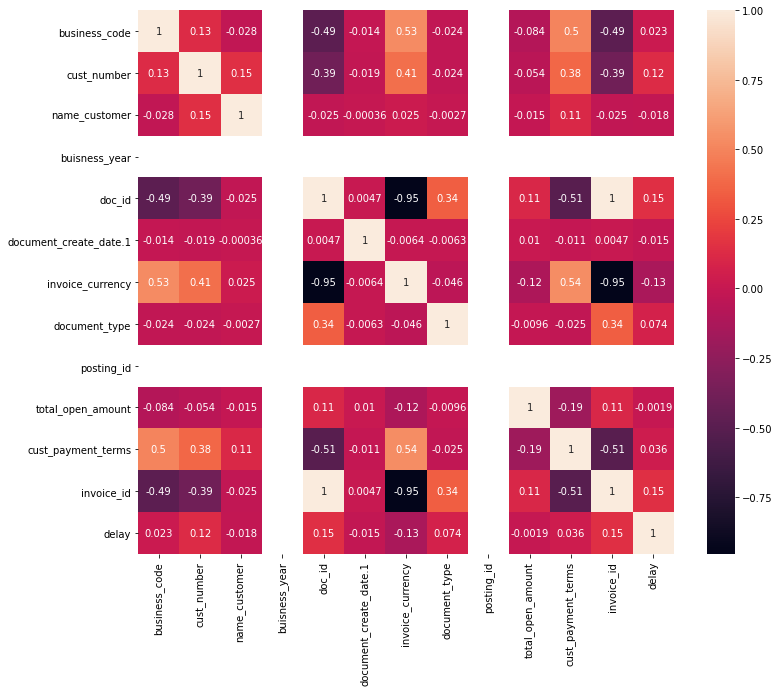

In [52]:
corr = train_data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [53]:
train_data.drop(columns=['doc_id','invoice_id','document_create_date.1','baseline_create_date'],inplace=True)
valid_data.drop(columns=['doc_id','invoice_id','document_create_date.1','baseline_create_date'],inplace=True)
test_data.drop(columns=['doc_id','invoice_id','document_create_date.1','baseline_create_date'],inplace=True)

In [54]:
train_data.head()

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,invoice_currency,document_type,posting_id,total_open_amount,cust_payment_terms,delay
35532,5,296,2465,2019.0,2018-12-30,2018-12-26,1,0,1.0,1574.71,53,-6
33502,5,296,2464,2019.0,2018-12-30,2018-12-26,1,0,1.0,24154.65,53,-6
38164,5,305,731,2019.0,2019-01-01,2018-12-28,1,0,1.0,6692.33,53,-8
45871,5,305,736,2019.0,2019-01-01,2018-12-28,1,0,1.0,2789.45,53,-9
13265,5,25,3202,2019.0,2018-12-30,2018-12-28,1,0,1.0,18602.72,53,30


In [55]:
train_data['day'] = train_data.document_create_date.dt.day
train_data['month'] = train_data.document_create_date.dt.month
train_data['year'] = train_data.document_create_date.dt.year

valid_data['day'] = valid_data.document_create_date.dt.day
valid_data['month'] = valid_data.document_create_date.dt.month
valid_data['year'] = valid_data.document_create_date.dt.year

test_data['day'] = test_data.document_create_date.dt.day
test_data['month'] = test_data.document_create_date.dt.month
test_data['year'] = test_data.document_create_date.dt.year

In [56]:
train_data.head()

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,invoice_currency,document_type,posting_id,total_open_amount,cust_payment_terms,delay,day,month,year
35532,5,296,2465,2019.0,2018-12-30,2018-12-26,1,0,1.0,1574.71,53,-6,26,12,2018
33502,5,296,2464,2019.0,2018-12-30,2018-12-26,1,0,1.0,24154.65,53,-6,26,12,2018
38164,5,305,731,2019.0,2019-01-01,2018-12-28,1,0,1.0,6692.33,53,-8,28,12,2018
45871,5,305,736,2019.0,2019-01-01,2018-12-28,1,0,1.0,2789.45,53,-9,28,12,2018
13265,5,25,3202,2019.0,2018-12-30,2018-12-28,1,0,1.0,18602.72,53,30,28,12,2018


In [57]:
## A function to create quarter column in every set using month 
def fun(a):
    for X in a:
        conditions = [(X.month<=3),(X.month>=4) & (X.month<=6),(X.month>=7) & (X.month<=9),(X.month>=10) & (X.month<=12)]
        value = [1,2,3,4]
        X['quarter'] = np.select(conditions,value)




In [58]:
a = [train_data,valid_data,test_data]
fun(a)

In [59]:
train_data.head()

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,invoice_currency,document_type,posting_id,total_open_amount,cust_payment_terms,delay,day,month,year,quarter
35532,5,296,2465,2019.0,2018-12-30,2018-12-26,1,0,1.0,1574.71,53,-6,26,12,2018,4
33502,5,296,2464,2019.0,2018-12-30,2018-12-26,1,0,1.0,24154.65,53,-6,26,12,2018,4
38164,5,305,731,2019.0,2019-01-01,2018-12-28,1,0,1.0,6692.33,53,-8,28,12,2018,4
45871,5,305,736,2019.0,2019-01-01,2018-12-28,1,0,1.0,2789.45,53,-9,28,12,2018,4
13265,5,25,3202,2019.0,2018-12-30,2018-12-28,1,0,1.0,18602.72,53,30,28,12,2018,4


In [60]:
train_data.drop(columns=['posting_date','document_create_date'],inplace=True)
valid_data.drop(columns=['posting_date','document_create_date'],inplace=True)
test_data.drop(columns=['posting_date','document_create_date'],inplace=True)

In [61]:
train_data.shape,train_out.shape

((31300, 14), (32000,))

In [62]:
#rows in train_data and train_out are different because I dropped duplicates from training set
#updating train_out with the delay column stored in train_data

In [63]:
train_out = train_data['delay']

In [64]:
train_data.shape,train_out.shape

((31300, 14), (31300,))

In [65]:
valid_data.shape,valid_out.shape

((8000, 14), (8000,))

In [66]:
train_data.drop(columns=['delay'],inplace=True)
valid_data.drop(columns=['delay'],inplace=True)
test_data.drop(columns=['delay'],inplace=True)

# Training Model 

In [67]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(train_data, train_out)

LinearRegression()

In [68]:
Y_valid_pred = model1.predict(valid_data)

In [69]:
from sklearn.metrics import mean_squared_error

### Prediction and mean square error for validation set

In [70]:
rmse = mean_squared_error(Y_valid_pred, valid_out, squared=False)

In [71]:
rmse

9.972631095714254

In [72]:
mse = mean_squared_error(Y_valid_pred, valid_out, squared=True)

In [73]:
mse

99.45337097120688

## Predicting for test_set

In [74]:
test_pred = model1.predict(test_data)

In [75]:
test_pred.max(),test_pred.min()

(8.8133512684185, -10.23824829496698)

<AxesSubplot:ylabel='Density'>

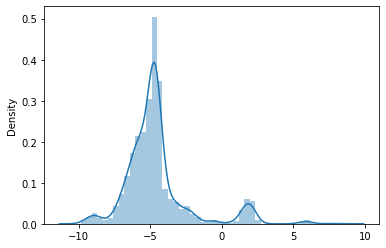

In [76]:
sns.distplot(test_pred)

In [77]:
final_test_data = file_data[file_data.isOpen==1]

In [78]:
final_test_data['delay'] = test_pred

In [79]:
final_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
3,U001,0200726979,BJ'S systems,NaT,2020.0,1.930581e+09,2020-02-29,2020-02-28,20200229,2020-03-15,USD,RV,1.0,202.06,2020-02-29,NAA8,1.930581e+09,1,-5.825232
7,U001,0200704858,WAKE foundation,NaT,2020.0,1.930620e+09,2020-03-08,2020-03-07,20200308,2020-03-23,USD,RV,1.0,20183.20,2020-03-08,NAA8,1.930620e+09,1,-6.493128
8,U001,0200769623,WAL-MAR,NaT,2020.0,1.930639e+09,2020-03-12,2020-03-11,20200312,2020-03-27,USD,RV,1.0,26549.39,2020-03-12,NAH4,1.930639e+09,1,-4.635214
22,U001,0200726979,BJ'S in,NaT,2020.0,1.930655e+09,2020-03-16,2020-03-15,20200316,2020-03-31,USD,RV,1.0,360.53,2020-03-16,NAA8,1.930655e+09,1,-5.683727
26,U001,0200720238,WOODM corp,NaT,2020.0,1.930779e+09,2020-04-13,2020-04-11,20200413,2020-04-28,USD,RV,1.0,26800.71,2020-04-13,NAA8,1.930779e+09,1,-6.233003


### Creating the column of predicted date

In [80]:
final_test_data['pred_clear_date'] = final_test_data.due_in_date + final_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(days=x))

### Creating buckets

In [81]:
bucket_conditions = [(final_test_data.delay<=0),(final_test_data.delay>0)&(final_test_data.delay<=5),
                     (final_test_data.delay>5)&(final_test_data.delay<=10)]

bucket_values = ['0 or less','0-5','5-10']


final_test_data['delay_interval'] = np.select(bucket_conditions,bucket_values)

In [82]:
final_test_data.reset_index(drop=True,inplace=True)

In [83]:
final_test_data.delay_interval.value_counts()

0 or less    9277
0-5           649
5-10           74
Name: delay_interval, dtype: int64

## Prediction on the data with no clear dates 

### Delay column containing the delay in payment

### pred_clear_date contains the date predicted by model

### delay_interval contains the interval of delay expected 

In [84]:
final_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document_type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,pred_clear_date,delay_interval
0,U001,0200726979,BJ'S systems,NaT,2020.0,1.930581e+09,2020-02-29,2020-02-28,20200229,2020-03-15,USD,RV,1.0,202.06,2020-02-29,NAA8,1.930581e+09,1,-5.825232,2020-03-10,0 or less
1,U001,0200704858,WAKE foundation,NaT,2020.0,1.930620e+09,2020-03-08,2020-03-07,20200308,2020-03-23,USD,RV,1.0,20183.20,2020-03-08,NAA8,1.930620e+09,1,-6.493128,2020-03-17,0 or less
2,U001,0200769623,WAL-MAR,NaT,2020.0,1.930639e+09,2020-03-12,2020-03-11,20200312,2020-03-27,USD,RV,1.0,26549.39,2020-03-12,NAH4,1.930639e+09,1,-4.635214,2020-03-23,0 or less
3,U001,0200726979,BJ'S in,NaT,2020.0,1.930655e+09,2020-03-16,2020-03-15,20200316,2020-03-31,USD,RV,1.0,360.53,2020-03-16,NAA8,1.930655e+09,1,-5.683727,2020-03-26,0 or less
4,U001,0200720238,WOODM corp,NaT,2020.0,1.930779e+09,2020-04-13,2020-04-11,20200413,2020-04-28,USD,RV,1.0,26800.71,2020-04-13,NAA8,1.930779e+09,1,-6.233003,2020-04-22,0 or less


# End

In [85]:
final_test_data.to_csv('output.csv')